In [1]:
import numpy as np
import pandas as pd
import glob
import re
import matplotlib.pyplot as plt

In [2]:
vmt_pathes = glob.glob("/Users/ishigurofutoshi/lab_materials/data/VMT/*.xlsx")
route_id_path = "/Users/ishigurofutoshi/lab_materials/data/route_id.xlsx"

In [3]:
vmt_list = []
route_id_list = []
for path in vmt_pathes:
    route_id = re.sub(r"\D", "", path)
    route_id_list.append(route_id)
    vmt_list.append(pd.read_excel(path,usecols=["Mean"]).rename(columns={"Mean":route_id}))
    vmt_df = pd.concat(vmt_list,axis=1)

In [4]:
route_id_df = pd.read_excel(route_id_path)

In [5]:
route_id_df = route_id_df.fillna(10)

In [6]:
vmt_per_mile_df = vmt_df.copy()
for route_id in route_id_list:
    mile = route_id_df[route_id]
    vmt_per_mile_df[route_id] = vmt_df[route_id].apply(lambda x:x/(mile*12))
vmt_per_mile_df = vmt_per_mile_df.dropna(axis=1)

In [7]:
vmt_per_mile_df

,6648,6218,415,6609,2133,6222,6721,6664,19981,6633,...,16509,6671,6221,6667,6688,6722,6630,77,18852,14467
0,182.291667,88.521303,165.277778,136.264368,169.644097,130.225061,234.878049,64.741379,125.375000,44.592593,...,171.340686,88.560606,37.500000,50.679825,87.500000,147.784553,39.296296,129.522831,110.983333,201.816817
1,123.000000,57.305764,118.450855,103.304598,120.552662,88.205596,200.914634,43.534483,93.408333,33.481481,...,116.269608,58.143939,19.111111,33.245614,70.307971,112.682927,31.055556,89.385845,71.533333,138.701201
2,96.375000,43.953634,98.472222,91.522989,102.870370,71.496350,193.475610,35.660920,84.466667,38.444444,...,96.350490,46.250000,12.861111,27.631579,69.855072,104.451220,37.444444,73.063927,54.725000,113.104354
3,92.208333,42.794486,99.049145,97.787356,112.936921,71.100973,212.296748,35.258621,108.108333,77.925926,...,104.438725,46.287879,16.000000,31.885965,112.481884,133.821138,79.314815,71.650685,53.383333,112.199700
4,146.395833,66.585213,144.529915,143.678161,191.171875,103.777372,291.951220,49.195402,249.033333,219.185185,...,181.889706,71.647727,49.083333,65.263158,251.286232,252.906504,200.222222,114.333333,83.900000,176.546547
5,269.604167,139.329574,287.596154,236.178161,372.997685,188.978102,425.223577,102.672414,435.558333,329.703704,...,338.901961,143.068182,137.194444,141.118421,352.010870,413.780488,269.148148,237.134703,176.333333,346.291291
6,368.375000,241.002506,467.585470,337.126437,522.282986,307.004258,483.150407,176.091954,465.183333,332.240741,...,456.269608,247.878788,182.694444,252.214912,371.231884,465.365854,275.018519,377.712329,304.558333,483.412162
7,424.000000,344.210526,566.485043,421.982759,565.422454,416.395985,529.471545,235.373563,490.366667,327.222222,...,525.698529,356.003788,202.750000,300.328947,390.851449,488.252033,272.370370,450.984018,433.766667,554.643393
8,434.708333,397.681704,591.004274,433.304598,589.846644,452.709854,544.207317,245.258621,505.291667,306.870370,...,534.142157,410.530303,210.847222,289.210526,380.851449,487.195122,246.777778,459.933790,500.475000,576.351351
9,453.291667,409.993734,606.688034,434.454023,609.817708,469.294404,549.674797,232.385057,507.375000,293.148148,...,535.529412,420.170455,218.500000,267.741228,376.503623,505.121951,232.759259,449.123288,515.733333,591.257508


In [8]:
vmt_per_mile_df.iloc[1,:]

6648     123.000000
6218      57.305764
415      118.450855
6609     103.304598
2133     120.552662
            ...    
6722     112.682927
6630      31.055556
77        89.385845
18852     71.533333
14467    138.701201
Name: 1, Length: 272, dtype: float64

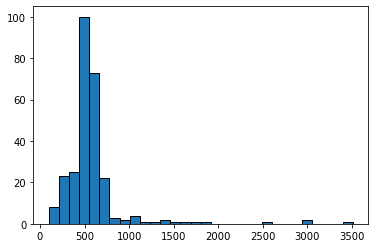

In [9]:
data = np.array(vmt_per_mile_df.iloc[12,:])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(data, bins=30, histtype='barstacked', ec='black')
plt.show()

In [10]:
route_num = len(vmt_per_mile_df.columns)
prevalence_rate = 0.001
missing_rate_df = pd.DataFrame(np.zeros(24*route_num).reshape(24,route_num),
                               columns=vmt_per_mile_df.columns)

In [11]:
for c in vmt_per_mile_df.columns:
    for i in range(len(vmt_per_mile_df)):
        missing_rate_df[c][i] = (1-prevalence_rate)**vmt_per_mile_df[c][i]

In [12]:
missing_rate_df

,6648,6218,415,6609,2133,6222,6721,6664,19981,6633,...,16509,6671,6221,6667,6688,6722,6630,77,18852,14467
0,0.833282,0.915243,0.847588,0.872552,0.843894,0.877841,0.790574,0.937279,0.882111,0.956366,...,0.842462,0.915207,0.963176,0.950559,0.916179,0.862553,0.961447,0.878458,0.894904,0.817162
1,0.884209,0.944278,0.888243,0.901806,0.886377,0.915532,0.817900,0.957379,0.910779,0.967057,...,0.890183,0.943487,0.981061,0.967285,0.932074,0.893384,0.969407,0.914452,0.930932,0.870428
2,0.908080,0.956977,0.906176,0.912499,0.902197,0.930966,0.824010,0.964950,0.918963,0.962267,...,0.908102,0.954781,0.987215,0.972733,0.932496,0.900772,0.963230,0.929507,0.946720,0.893007
3,0.911873,0.958088,0.905653,0.906797,0.893157,0.931335,0.808639,0.965339,0.897482,0.924997,...,0.900783,0.954745,0.984119,0.968602,0.893563,0.874688,0.923712,0.930823,0.947991,0.893816
4,0.863752,0.935552,0.865366,0.866104,0.825912,0.901379,0.746696,0.951972,0.779457,0.803085,...,0.833617,0.930825,0.952078,0.936790,0.777702,0.776442,0.818467,0.891910,0.919485,0.838086
5,0.763579,0.869881,0.749957,0.789547,0.688538,0.827726,0.653485,0.902376,0.646762,0.719018,...,0.712431,0.866633,0.871741,0.868325,0.703149,0.661009,0.763927,0.788791,0.838265,0.707184
6,0.691730,0.785745,0.626367,0.713698,0.593010,0.735534,0.616688,0.838467,0.627874,0.717195,...,0.633498,0.780358,0.832947,0.776980,0.689756,0.627759,0.759454,0.685298,0.737337,0.616526
7,0.654285,0.708658,0.567356,0.655607,0.567959,0.659282,0.588760,0.790183,0.612252,0.720805,...,0.590987,0.700345,0.816400,0.740463,0.676348,0.613548,0.761468,0.636857,0.647923,0.574118
8,0.647313,0.671742,0.553607,0.648222,0.554249,0.635759,0.580144,0.782406,0.603177,0.735633,...,0.586015,0.663162,0.809812,0.748746,0.683149,0.614197,0.781218,0.631180,0.606091,0.561783
9,0.635389,0.663518,0.544988,0.647477,0.543284,0.625297,0.576979,0.792549,0.601921,0.745802,...,0.585202,0.656797,0.803636,0.765003,0.686127,0.603279,0.792252,0.638044,0.596909,0.553467


In [13]:
missing_rate_df.to_excel("/Users/ishigurofutoshi/lab_materials/data/missing_rate_0.001.xlsx")